**UNIT - Curso de Computação**

**Processamento de Imagens de Computação Gráfica**

Profª. Layse Santos Souza

# **Realce de Imagens**

***Histograma*** é um gráfico que permite visualizar a distribuição de intensidade de uma imagem, com os pixels variando entre 0 e 255 (geralmente).

É uma forma de entender a imagem, onde conseguimos ter intuições sobre o contraste, brilho e intensidade da imagem.

# Criando o histograma em Python

In [ ]:
#bibliotecas necessárias

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv 


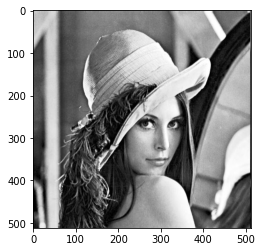

In [13]:
img_gray = cv.imread("/content/lena.jpg")
plt.imshow(img_gray, cmap = 'gray')

In [14]:
# A função a seguir retorna o histograma de uma imagem         
def get_histogram(imagem, limite_cinza):
    array = imagem.flatten()
    hist = np.zeros(limite_cinza,dtype='int')
    for i in range(0, len(array)):
        hist[array[i]] +=1
    return hist

In [15]:
# imprimir a matriz do histograma
histogram = get_histogram(img_gray, 256)
print(histogram) 

[6099 1956 2376 2529 2628 2754 2871 3105 3246 3162 3345 3282 3153 3297
 3210 3087 3288 3240 3387 3393 3534 3096 3330 3333 3285 3288 3315 3264
 3135 3300 3285 3192 3069 2973 2940 2988 2985 2841 2646 3126 2832 2781
 2757 2727 2742 2736 2850 2664 3186 2862 3123 3117 3048 3183 3150 3132
 2889 3033 2988 2685 2859 2832 2880 2697 3174 3120 3141 3210 2991 3093
 3012 3195 3096 3216 3240 3351 3402 3501 3570 3684 3690 3564 3432 3378
 3225 3273 3018 3024 3072 3012 2856 3051 2976 2832 2775 2919 2874 2760
 2682 2628 2751 2862 3006 3258 3015 2949 2976 2997 2940 2901 3261 3072
 3180 3036 3060 2928 2934 3144 3111 3045 3033 3255 3261 3243 3426 3204
 3546 3561 3552 3486 3423 3477 3285 3420 2967 3150 3066 2934 2712 2628
 2880 2613 2841 2709 3033 3039 3024 3153 3231 2997 3207 3060 3030 3219
 3132 3123 3120 3141 3174 3027 3219 3303 3006 3177 3291 3051 2922 3081
 2895 2970 3009 2955 3066 2865 3093 2868 2979 3072 2994 3204 3159 3087
 3252 3294 3279 3348 3489 3129 3312 3129 3228 3096 3123 3012 2763 3123
 3039 

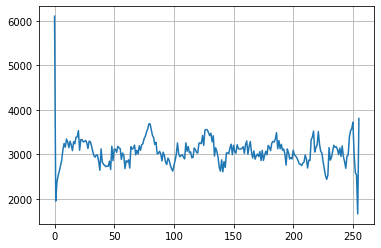

In [16]:
# mostrar o gráfico da imagem
plt.grid("on")

x = range(len(histogram))
y = histogram

plt.plot(x, y) 

* Histograma com baixo constraste 

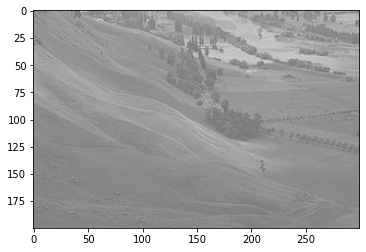

In [21]:
imagemBaixoContraste = cv.imread("/content/baixoContraste.jpg")
plt.imshow(imagemBaixoContraste, cmap = 'gray')

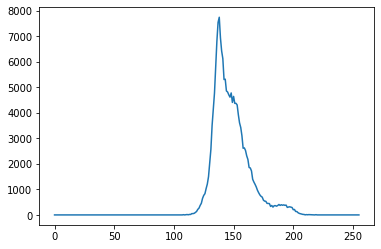

In [22]:
histogram = get_histogram(imagemBaixoContraste, 256)

x = range(len(histogram))
y = histogram

plt.plot(x, y)

* Histograma com alto constraste 

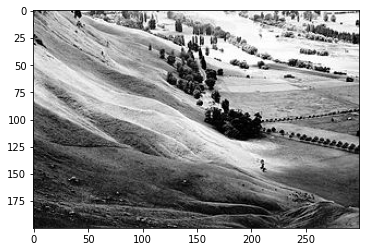

In [23]:
imagemAltoContraste = cv.imread("/content/altoContraste.jpg")
plt.imshow(imagemAltoContraste, cmap = 'gray')

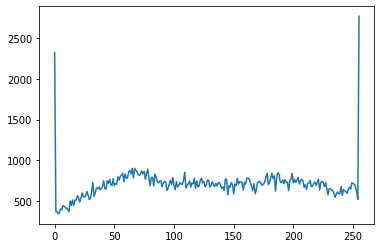

In [24]:
histogram = get_histogram(imagemAltoContraste, 256)

x = range(len(histogram))
y = histogram

plt.plot(x, y)

# Encontrando o histograma usando o OpenCV





In [1]:
#bibliotecas necessárias

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv 

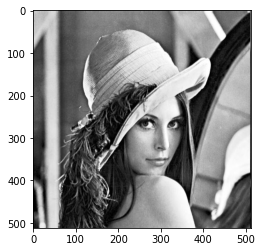

In [2]:
imagem = cv.imread("/content/lena.jpg") #Abre uma imagem com o OpenCV
plt.imshow(imagem) #Exibe a imagem

In [3]:
print("Tamanho da imagem: ", imagem.shape) #Exibe altura, largura e canais

Tamanho da imagem:  (512, 512, 3)


Podemos ver que a imagem está com os canais trocados. Por padrão, o OpenCV carrega as imagens no formato BGR ao invés de RGB. Podemos convertê-la para RGB com uma linha de código:

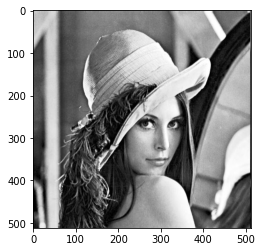

In [4]:
imagemNova = cv.cvtColor(imagem, cv.COLOR_BGR2RGB)
plt.imshow(imagemNova)

Calcular o histograma antes de transformar a imagem em tons de cinza. Para isso, começaremos a manipular a imagem usando o OpenCV. 

**OBS.:** *Um resultado similar pode ser alcançado usando o Pillow e também o skimage, porém o último nos retorna uma informação entre [0..1] ao invés de [0..255].*

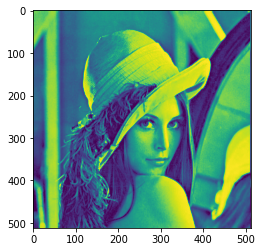

In [5]:
imagemCinza = cv.cvtColor(imagem, cv.COLOR_RGB2GRAY)
plt.imshow(imagemCinza)

In [6]:
print(imagemCinza.shape)

(512, 512)


O *matplotlib* está mostrando a imagem com 3 canais, quando ela só tem uma. Precisamos convertê-la para 3 canais, trazendo-a de volta para RGB.

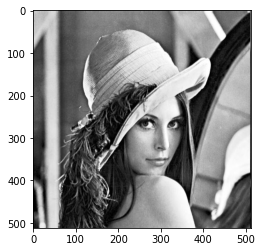

In [7]:
plt.imshow(cv.cvtColor(imagemCinza, cv.COLOR_GRAY2RGB))

Usaremos o método `calcHist() `do OpenCV para calcular o histograma da imagem. 

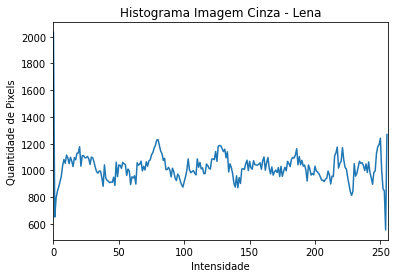

In [20]:
#Função calcHist para calcular o histograma da imagem
h = cv.calcHist([imagemCinza], [0], None, [256], [0, 256])
plt.figure()
plt.title("Histograma Imagem Cinza - Lena")
plt.xlabel("Intensidade")
plt.ylabel("Quantidade de Pixels")
plt.plot(h)
plt.xlim([0, 256]) #intervalo [0...255]
plt.show()

Também é possível plotar o histograma de outra forma, com a ajuda da função `ravel()` do matplotlib. 

Neste caso o eixo X avança o valor 255 indo até 300, espaço que não existem pixels.

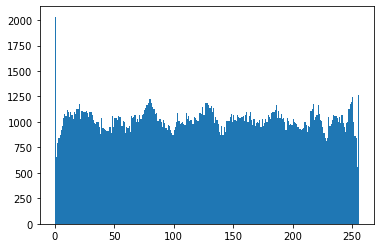

In [19]:
plt.hist(imagemCinza.ravel(),256,[0,256])
plt.show() 

# Encontrando o histograma de uma imagem colorida usando o OpenCV





Além do histograma da imagem em tons de cinza é possível plotar um histograma da imagem colorida. Neste caso teremos três linhas, uma para cada canal

In [33]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

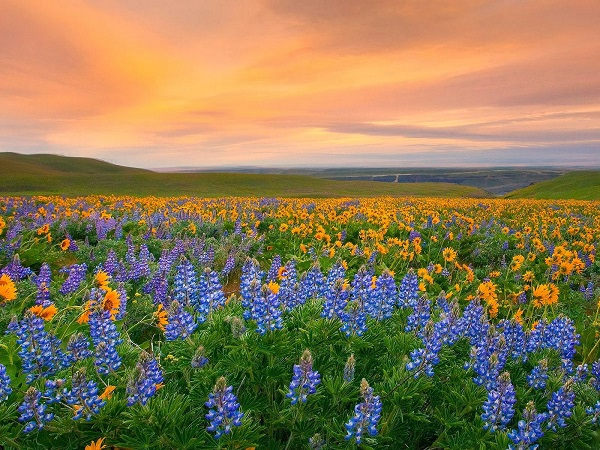

In [34]:
imagemColorida = cv.imread('/content/imagemColorida.jpg')
cv2_imshow(imagemColorida)

In [44]:
print(imagemColorida.shape)

(450, 600, 3)


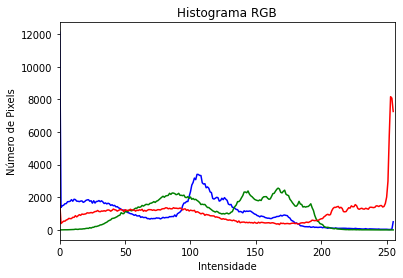

In [43]:
color = ('b','g','r')

plt.title("Histograma RGB")
plt.xlabel("Intensidade")
plt.ylabel("Número de Pixels")

for channel,col in enumerate(color): # channel -> canais da imagem colorida
    histr = cv.calcHist([imagemColorida],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()
